## Kanye Lyrics : Song generator, NLP, topic modeling

* 칸예 웨스트의 243개의 곡들 중에 364개의 rap verse들을 활용하여 새로운 가사를 만들어 보는 kaggle kernel.


* 활용되는 분석모형
    + 감성분석
    + markov chain을 이용한 가사 임의 생성
    + 토픽모델링
    
    
- 칸예로 연습하고 익숙해지면 에미넴을 해보자!!


In [11]:
%cd C:\Users\hanbum\Desktop\2018\work\2. Project\3. Personal\kanye
%pwd

C:\Users\hanbum\Desktop\2018\work\2. Project\3. Personal\kanye


'C:\\Users\\hanbum\\Desktop\\2018\\work\\2. Project\\3. Personal\\kanye'

In [64]:
import io
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(context='talk', style ='ticks')

### (1). load data

In [45]:
kanye = pd.DataFrame({'lyrics': io.open('kanye_verses.txt', 'r', encoding='ascii', errors='ignore').read().split('\n\n')})

In [50]:
kanye.head()

,lyrics
0,Let the suicide doors up\nI threw suicides on ...
1,"She said, ""'Ye, can we get married at the mall..."
2,"Break records at Louis, ate breakfast at Gucci..."
3,What you doin' in the club on a Thursday?\nShe...
4,"I wanna fuck you hard on the sink\nAfter that,..."


인덱스에 노래 제목이 없는 것이 아쉽다

In [51]:
kanye.lyrics[0]

"Let the suicide doors up\nI threw suicides on the tour bus\nI threw suicides on the private jet\nYou know what that mean, I'm fly to death\nI step in Def Jam buildin' like I'm the shit\nTell 'em give me fifty million or I'ma quit\nMost rappers' taste level ain't at my waist level\nTurn up the bass 'til it's up-in-yo-face level\nDon't do no press but I get the most press kit\nPlus, yo, my bitch make your bitch look like Precious\nSomethin' 'bout Mary, she gone off that molly\nNow the whole party is melted like Dal\nNow everybody is movin' they body\nDon't sell me apartment, I'll move in the lobby\nNiggas is loiterin' just to feel important\nYou gon' see lawyers and niggas in Jordans"

### (2). Feature Engineering

In [52]:
# characters, words, lines
kanye['#characters'] = kanye.lyrics.str.len()

kanye['#words'] = kanye.lyrics.str.split().str.len()

kanye['#lines'] = kanye.lyrics.str.split('\n').str.len()

kanye['#uniq_words'] = kanye.lyrics.apply(lambda x: len(set(x.split())))

kanye['lexical_density'] = kanye['#uniq_words'] / kanye['#words']

**lexical density??** 

--> 컴퓨터 언어학에서 어휘 밀도는 전체적으로 문법적으로 어휘 단위별로 추정되는 내용 측정치를 구한다.

일반적으로 '말'로 이루어진 텍스트가 글보다 어휘 밀도가 낮다.

In [53]:
kanye.head()

,lyrics,#characters,#words,#lines,#uniq_words,lexical_density
0,Let the suicide doors up\nI threw suicides on ...,675,131,16,99,0.755725
1,"She said, ""'Ye, can we get married at the mall...",772,148,18,111,0.750000
2,"Break records at Louis, ate breakfast at Gucci...",1479,286,33,212,0.741259
3,What you doin' in the club on a Thursday?\nShe...,632,101,16,80,0.792079
4,"I wanna fuck you hard on the sink\nAfter that,...",748,144,18,96,0.666667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BF212EFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025BF24E8E80>]], dtype=object)

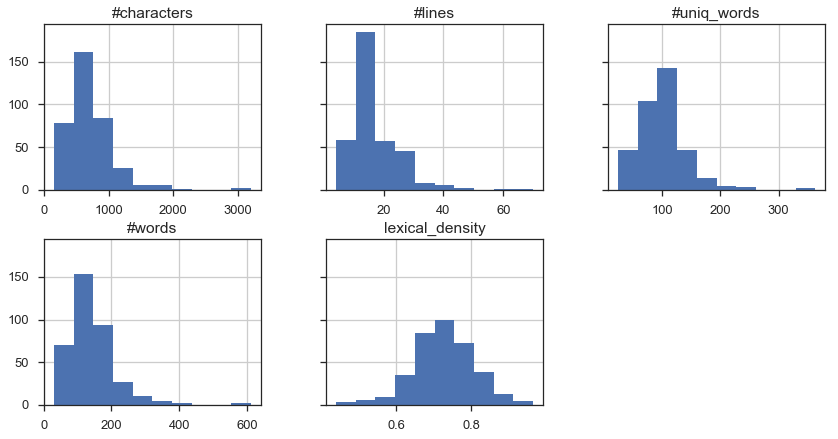

In [58]:
kanye.hist(sharey= True,layout=(2,3),figsize=(14,7))

*
*

    * 대부분의 곡들은 20라인, 200개의 단어,150개의 유니크 단어들로 이루어졌다
    * lexcial density는 다른 가수들에 비하면 상대적으로 높은편이라고 한다



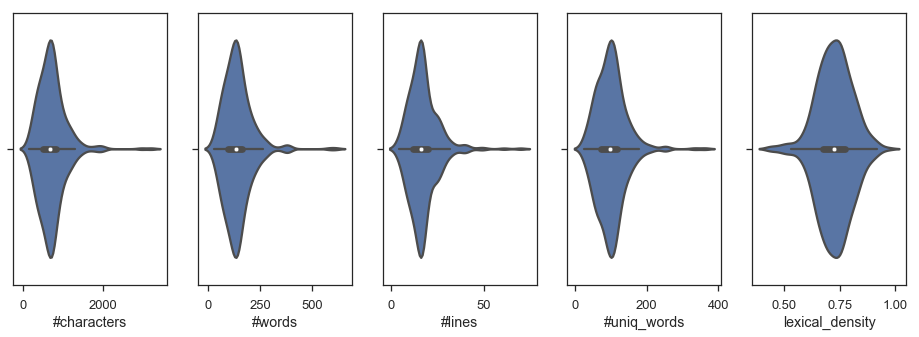

In [65]:
cols_metrics = kanye.select_dtypes(include=[np.number]).columns

fig, axs = plt.subplots(ncols=len(cols_metrics), figsize=(16, 5))

for i, c in enumerate(cols_metrics):
    sns.violinplot(x=kanye[c], ax=axs[i], sharex=True)

### (3). Word Length Distribution